In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('flightdata.csv')
dataset

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [3]:
flight_data = dataset[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_DEL15']]
flight_data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_DEL15
0,1,1,5,1399,ATL,SEA,1905,1907.0,2143,0.0
1,1,1,5,1476,DTW,MSP,1345,1344.0,1435,0.0
2,1,1,5,1597,ATL,SEA,940,942.0,1215,0.0
3,1,1,5,1768,SEA,MSP,819,820.0,1335,0.0
4,1,1,5,1823,SEA,DTW,2300,2256.0,607,0.0
...,...,...,...,...,...,...,...,...,...,...
11226,12,30,5,1715,DTW,ATL,1005,1003.0,1223,0.0
11227,12,30,5,1770,SEA,MSP,1525,1559.0,2046,0.0
11228,12,30,5,1823,DTW,SEA,1959,1959.0,2210,0.0
11229,12,30,5,1901,ATL,SEA,1530,1529.0,1806,0.0


In [4]:
flight_data.isnull().any()

MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
FL_NUM          False
ORIGIN          False
DEST            False
CRS_DEP_TIME    False
DEP_TIME         True
CRS_ARR_TIME    False
ARR_DEL15        True
dtype: bool

In [5]:
flight_data['DEP_TIME'].fillna(flight_data['DEP_TIME'].mean(),inplace = True)
flight_data['ARR_DEL15'].fillna(flight_data['ARR_DEL15'].mode()[0],inplace = True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
flight_data.isnull().any()

MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
FL_NUM          False
ORIGIN          False
DEST            False
CRS_DEP_TIME    False
DEP_TIME        False
CRS_ARR_TIME    False
ARR_DEL15       False
dtype: bool

In [7]:
flight_data['ORIGIN'].unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [8]:
flight_data['ORIGIN'].value_counts()

ATL    3100
MSP    2538
DTW    2201
SEA    2018
JFK    1374
Name: ORIGIN, dtype: int64

In [9]:
flight_data['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [10]:
flight_data['DEST'].value_counts()

ATL    3221
MSP    2493
DTW    2211
SEA    1994
JFK    1312
Name: DEST, dtype: int64

Text(0.5, 1.0, 'DEP_TIME v/s ARR_DEL15')

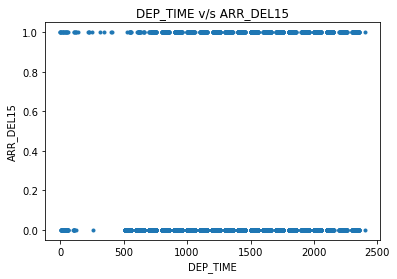

In [11]:
plt.scatter(flight_data['DEP_TIME'],flight_data['ARR_DEL15'], marker='.')
plt.xlabel("DEP_TIME")
plt.ylabel("ARR_DEL15")
plt.title("DEP_TIME v/s ARR_DEL15")

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flight_data['ORIGIN'] = le.fit_transform(flight_data['ORIGIN'])
flight_data['DEST'] = le.fit_transform(flight_data['DEST'])

<ipython-input-12-3b86461788c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['ORIGIN'] = le.fit_transform(flight_data['ORIGIN'])
<ipython-input-12-3b86461788c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['DEST'] = le.fit_transform(flight_data['DEST'])


In [13]:
x = flight_data.iloc[:,0:9]
x

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME
0,1,1,5,1399,0,4,1905,1907.0,2143
1,1,1,5,1476,1,3,1345,1344.0,1435
2,1,1,5,1597,0,4,940,942.0,1215
3,1,1,5,1768,4,3,819,820.0,1335
4,1,1,5,1823,4,1,2300,2256.0,607
...,...,...,...,...,...,...,...,...,...
11226,12,30,5,1715,1,0,1005,1003.0,1223
11227,12,30,5,1770,4,3,1525,1559.0,2046
11228,12,30,5,1823,1,4,1959,1959.0,2210
11229,12,30,5,1901,0,4,1530,1529.0,1806


In [14]:
y = flight_data.iloc[:,9:10]
y

,ARR_DEL15
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
11226,0.0
11227,0.0
11228,0.0
11229,0.0


In [15]:
x = x.values
y = y.values
x, y

(array([[1.000e+00, 1.000e+00, 5.000e+00, ..., 1.905e+03, 1.907e+03,
         2.143e+03],
        [1.000e+00, 1.000e+00, 5.000e+00, ..., 1.345e+03, 1.344e+03,
         1.435e+03],
        [1.000e+00, 1.000e+00, 5.000e+00, ..., 9.400e+02, 9.420e+02,
         1.215e+03],
        ...,
        [1.200e+01, 3.000e+01, 5.000e+00, ..., 1.959e+03, 1.959e+03,
         2.210e+03],
        [1.200e+01, 3.000e+01, 5.000e+00, ..., 1.530e+03, 1.529e+03,
         1.806e+03],
        [1.200e+01, 3.000e+01, 5.000e+00, ..., 7.250e+02, 7.230e+02,
         9.250e+02]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
z=ohe.fit_transform(x[:,4:5]).toarray()
t=ohe.fit_transform(x[:,5:6]).toarray()

In [17]:
x=np.delete(x,[4,5],axis=1)

In [18]:
x=np.concatenate((z,t,x),axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [21]:
from joblib import dump
dump(ss, "scale.save")

['scale.save']

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0., 0., 0., ..., 0., 0., 1.])

In [24]:
y_test

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [25]:
from sklearn.metrics import accuracy_score
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_dtc

0.8825100133511349

In [26]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1844,  129],
       [ 135,  139]], dtype=int64)

In [27]:
dump(dtc, 'Flight_Delay_Prediction.save')

['Flight_Delay_Prediction.save']